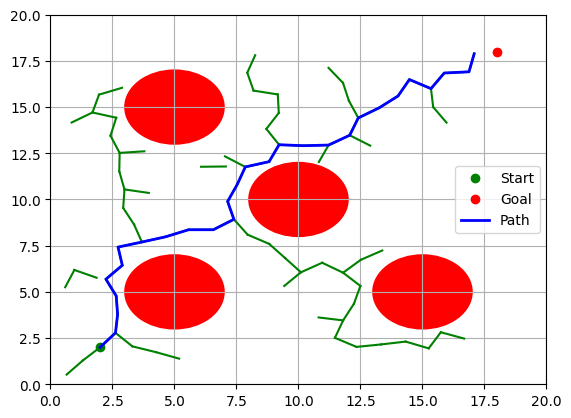

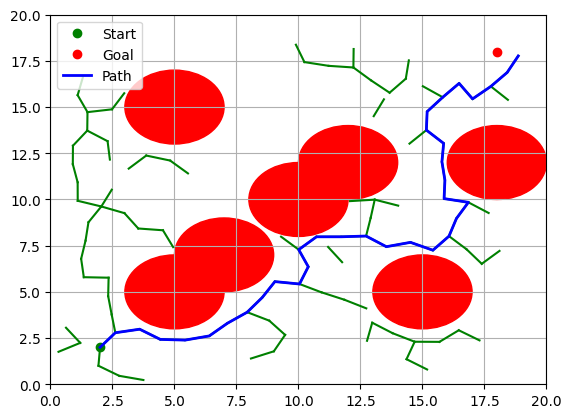

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 2: Define the Node class used for the RRT tree
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

# Step 3: Define the RRT algorithm class
class RRT:
    def __init__(self, start, goal, map_dim, obstacle_list, step_size=1.0, max_iter=500):
        self.start = Node(start[0], start[1])
        self.goal = Node(goal[0], goal[1])
        self.map_dim = map_dim
        self.obstacle_list = obstacle_list
        self.step_size = step_size
        self.max_iter = max_iter
        self.node_list = [self.start]

    # Function to generate a random node
    def get_random_node(self):
        return Node(random.uniform(0, self.map_dim[0]), random.uniform(0, self.map_dim[1]))

    # Function to calculate the Euclidean distance between two nodes
    def distance(self, node1, node2):
        return np.sqrt((node1.x - node2.x) ** 2 + (node1.y - node2.y) ** 2)

    # Function to find the nearest node in the current tree
    def get_nearest_node(self, random_node):
        distances = [self.distance(node, random_node) for node in self.node_list]
        nearest_index = np.argmin(distances)
        return self.node_list[nearest_index]

    # Function to steer the tree towards the random node
    def steer(self, from_node, to_node):
        distance = self.distance(from_node, to_node)
        if distance < self.step_size:
            return to_node
        else:
            theta = np.arctan2(to_node.y - from_node.y, to_node.x - from_node.x)
            new_x = from_node.x + self.step_size * np.cos(theta)
            new_y = from_node.y + self.step_size * np.sin(theta)
            new_node = Node(new_x, new_y)
            new_node.parent = from_node
            return new_node

    # Function to check if a node is within an obstacle
    def is_in_obstacle(self, node):
        for (ox, oy, size) in self.obstacle_list:
            if (ox - size <= node.x <= ox + size) and (oy - size <= node.y <= oy + size):
                return True
        return False

    # Function to check if the goal is reached
    def is_goal_reached(self, node):
        return self.distance(node, self.goal) < self.step_size

    # Main function to run the RRT algorithm
    def plan(self):
        for _ in range(self.max_iter):
            random_node = self.get_random_node()
            nearest_node = self.get_nearest_node(random_node)
            new_node = self.steer(nearest_node, random_node)

            if not self.is_in_obstacle(new_node):
                self.node_list.append(new_node)

                if self.is_goal_reached(new_node):
                    return self.get_final_path(new_node)

        return None  # Path not found within the maximum iterations

    # Function to trace back the path from the goal to the start
    def get_final_path(self, goal_node):
        path = [(goal_node.x, goal_node.y)]
        node = goal_node
        while node.parent is not None:
            node = node.parent
            path.append((node.x, node.y))
        return path

# Step 4: Define the environment (map, obstacles, start and goal positions)
map_dim = (20, 20)
start = (2, 2)
goal = (18, 18)
obstacle_list = [
    (5, 5, 2), (10, 10, 2), (15, 5, 2), (5, 15, 2)
]  # Obstacles are defined as (x, y, size)

# Step 5: Initialize the RRT planner
rrt = RRT(start, goal, map_dim, obstacle_list)

# Step 6: Run the RRT algorithm to plan a path
path = rrt.plan()

# Step 7: Visualize the map, obstacles, and the planned path
def plot_path(rrt, path):
    fig, ax = plt.subplots()

    # Plot the map boundaries
    ax.set_xlim(0, rrt.map_dim[0])
    ax.set_ylim(0, rrt.map_dim[1])

    # Plot the obstacles
    for (ox, oy, size) in rrt.obstacle_list:
        circle = plt.Circle((ox, oy), size, color='red')
        ax.add_artist(circle)

    # Plot the start and goal positions
    ax.plot(rrt.start.x, rrt.start.y, "go", label="Start")
    ax.plot(rrt.goal.x, rrt.goal.y, "ro", label="Goal")

    # Plot the RRT tree
    for node in rrt.node_list:
        if node.parent is not None:
            ax.plot([node.x, node.parent.x], [node.y, node.parent.y], "g-")

    # Plot the final path
    if path is not None:
        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], "b-", linewidth=2, label="Path")
    else:
        print("Path not found!")

    plt.legend()
    plt.grid(True)
    plt.show()

# Step 8: Plot the result
plot_path(rrt, path)

# Step 9: Red Team Testing: Test the RRT under adverse conditions
# Simulate more complex obstacle environment by adding dynamic obstacles
new_obstacles = [(7, 7, 2), (12, 12, 2), (18, 12, 2)]  # Additional obstacles

# Re-initialize the RRT with the new obstacle configuration
rrt_red_team = RRT(start, goal, map_dim, obstacle_list + new_obstacles)

# Re-plan the path in the more complex environment
new_path = rrt_red_team.plan()

# Plot the result with dynamic obstacles
plot_path(rrt_red_team, new_path)
